In [1]:
import numpy as np

`-` 지난시간 복습

||특징1(수렴)|특징2(동일row)|특징3(정상분포)|특징4(정상과정)|
|:-:|:-:|:-:|:-:|:-:|
|예시1(나이스)|O|O|존재O, 유일O|O|
|예시2(나이스)|O|O|존재O, 유일O|O|
|예시3(흡수)|O|O|존재O, 유일O|O|
|예시4(단위행렬)|O|X|존재O, 유일X|O|
|예시5(주기)|X|X|존재O, 유일O|O|

`-` 목표: 예시4와 예시5를 좀 더 공부해보자. 

# irreducible 

## Motivation Examples 

### 예제1

`-` 아래의 전이확률을 고려하자. 

In [2]:
P =np.array([0.5, 0.5, 0.0, 0.0, 
             0.5, 0.5, 0.0, 0.0,
             0.0, 0.0, 0.5, 0.5,
             0.0, 0.0, 0.5, 0.5]).reshape(4,4)
P

array([[0.5, 0.5, 0. , 0. ],
       [0.5, 0.5, 0. , 0. ],
       [0. , 0. , 0.5, 0.5],
       [0. , 0. , 0.5, 0.5]])

`-` 특징1: ${\bf P}$는 수렴함 

`-` 특징2: 모든 row가 같은건 아님 

`-` 특징3: 정상분포는 유일하게 존재하지 않음 

`-` 특징4: 임의의 초기분포에 대하여, $\{X_t\}$의 뒷부분은 동일한 분포를 가짐. 

`-` 특징5: 상태공간 $E$ 에 equivalence class 가 2개 있는 느낌 

### 예제2

`-` 아래의 전이확률을 고려하자. 

In [6]:
P =np.array([1/4, 1/4, 0.0, 1/2, 
             1/4, 1/4, 0.0, 1/2,
             0.0, 0.0, 1.0, 0.0,
             1/2, 1/4, 0.0, 1/4]).reshape(4,4)
P

array([[0.25, 0.25, 0.  , 0.5 ],
       [0.25, 0.25, 0.  , 0.5 ],
       [0.  , 0.  , 1.  , 0.  ],
       [0.5 , 0.25, 0.  , 0.25]])

`-` 특징1: ${\bf P}$는 수렴함

`-` 특징2: 모든 row가 같지는 않음 

`-` 특징3: 유일한 정상분포를 가지는건 아님

`-` 특징4: 임의의 초기분포에 대하여, $\{X_t\}$의 뒷부분은 동일한 분포를 가짐. 

`-` 특징5: 상태공간 $E$에 equivalence class 가 2개 있는 느낌 

## 정의 및 이론

`-` **용어**

- irreducible (기약) // reducible (비기약) 
- (strongly) connected 

`-` **정의**

`-` **느낌**

- 연결되어있는 느낌. 즉 모든 $x,y \in E$에 대하여 $x\to \cdots \to y$ 인 path 나 $y \to \cdots \to x$ 인 path 가 존재함 
- 겉도는 그룹이 없음 (상태공간 $E$에 단 하나의 equivalence class가 존재함) 

`-` **Thm**: HMC $\{X_t\}$ 가 (1) finite state space 를 가지고 (2) irreducible 이라면 $\{X_t\}$의 유일한 정상분포 ${\boldsymbol \pi}$가 존재하며 모든 state에 대한 확률은 양수이다. 

# aperiodic 

## Motivation Examples 

### 예제3

`-` 아래와 같은 전이확률을 고려하자. 

In [12]:
P = np.array([0.0, 1.0, 0.0,
              0.0, 0.0, 1.0,
              1.0, 0.0, 0.0]).reshape(3,3)
P

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

`-` 다이어그램 

```{mermaid}
flowchart LR
  0 -->|1| 1
  1 -->|1| 2
  2 -->|1| 0
```

`-` 특징1: ${\bf P}$는 수렴안함

In [13]:
P@P@P

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

`-` 특징2: 

`-` 특징3: 정상분포는 유일하게 존재함.

In [14]:
π = np.array([1/3,1/3,1/3]).reshape(3,1)
π

array([[0.33333333],
       [0.33333333],
       [0.33333333]])

In [15]:
π.T @ P == π.T

array([[ True,  True,  True]])

`-` 특징4: 임의의 초기분포에 대하여, $\{X_t\}$의 뒷부분은 동일한 분포를 가짐. 

`-` 특징5: 상태공간 $E$에 equivalence class 가 1개

`-` 특징6: 주기성을 가짐 (주기는 3)

- 관찰: 어떠한 상태 $x \in E$ 에 있더라도 반드시 3번 안에는 원래 상태로 되돌아옴.

### 예제4 

`-` 아래와 같은 전이확률을 고려하자. 

In [33]:
P = np.array([0.0, 1.0, 0.0, 0.0,
              0.0, 0.0, 0.0, 1.0,
              0.0, 1.0, 0.0, 0.0,
              1/3, 0.0, 2/3, 0.0]).reshape(4,4)
P

array([[0.        , 1.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        , 0.        ],
       [0.33333333, 0.        , 0.66666667, 0.        ]])

`-` 다이어그램 

```{mermaid}
flowchart LR
  0 -->|1| 1
  1 -->|1| 3
  2 -->|1| 1
  3 -->|1/3| 0 
  3 -->|2/3| 2
```

`-` 특징1: ${\bf P}$는 수렴안함 

`-` 특징2: Pass

`-` 특징3: 정상분포는 유일하게 존재함. 

`-` 특징4: 임의의 초기분포에 대하여, $\{X_t\}$의 뒷부분은 동일한 분포를 가짐. 

`-` 특징5: irr

`-` 특징6: 주기성을 가짐 (주기는3) 

```{mermaid}
flowchart LR
  0 -->|1| 1
  1 -->|1| 3
  2 -->|1| 1
  3 -->|1/3| 0 
  3 -->|2/3| 2
```

**0에서 시작한다면?**

- $0 \to 1 \to 3 \to 0$
- $0 \to 1 \to 3 \to 2 \to 1 \to 3 \to 0$
- $0 \to 1 \to 3 \to 2 \to 1 \to 3 \to 2 \to \cdots$

> 3번만에 되돌아오거나, 6번만에 되돌아오거나, 9번만에 되돌아오거나 ... $\Rightarrow$ 주기는 3 (3,6,9의 최대공약수는 3)

**1에서 시작한다면?**

- $1 \to 3 \to 0 \to 1$
- $1 \to 3 \to 2 \to 1 \to 3 \to 0 \to 1$
- $\dots$ 

**2에서 시작한다면?**


**3에서 시작한다면?**

> 꿀팁: HMC $\{X_t\}$가 irreducible 이라면 모든 $x \in E$ 는 같은 주기를 가진다. 

### 예제5

`-` 아래의 전이확률을 고려하자. 

In [31]:
P =np.array([0.0, 1.0, 0.0, 0.0, 
             1/2, 0.0, 1/2, 0.0,
             0.0, 0.0, 0.0, 1.0,
             0.0, 1.0, 0.0, 0.0]).reshape(4,4)
P

array([[0. , 1. , 0. , 0. ],
       [0.5, 0. , 0.5, 0. ],
       [0. , 0. , 0. , 1. ],
       [0. , 1. , 0. , 0. ]])

`-` 다이어그램 

```{mermaid}
flowchart LR
  0 -->|1| 1
  1 -->|1/2| 0
  1 -->|1/2| 2
  2 -->|1| 3
  3 -->|1| 1
```

`-` 특징1,2: 

`-` 특징3: 정상분포를 가짐

`-` 특징4: 임의의 초기분포에 대하여, $\{X_t\}$의 뒷부분은 동일한 분포를 가짐. 

`-` 특징5: irr

`-` 특징6: 주기가 없음 

```{mermaid}
flowchart LR
  0 -->|1| 1
  1 -->|1/2| 0
  1 -->|1/2| 2
  2 -->|1| 3
  3 -->|1| 1
```

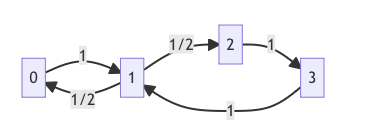

**1에서 시작한다면?**

- $1 \to 0 \to 1$, 2번만에 리턴
- $1 \to 2 \to 3 \to 1$, 3번만에 리턴 

이 경우 2와 3의 최대공약수는 1이므로 주기는 1이다. 

> 주기가 1인 경우는 aperiodic 하다고 표현한다. (언제 올지 몰라)

> 꿀팁: 자기자신으로 되돌아올 확률이 있다면 항상 aperiodic 하다.

## 정의 및 이론 

`-` 정의

`-` 느낌 

`-` **이론**: $\{X_t\}$가 finte state HMC 이면, 모든 상태가 항상 같은 주기를 가진다. 

# 에르고딕 마코프체인

## 정의 및 이론

`-` **Thm**: HMC $\{X_t\}$가 (1) finite state space를 가지고 (2) irreduciable 하고 (3) aperiodic 이라면, ${\bf P}$가 수렴하고 수렴한 matrix의 모든 row는 같다. 따라서 임의의 초기분포 ${\boldsymbol \mu}$ 에 대하여 

$$\lim_{t\to \infty}{\boldsymbol \mu}^\top{\bf P}^t = {\boldsymbol \pi}^\top $$

이 성립한다. 여기에서 ${\boldsymbol \pi}$는 $\{X_t\}$의 정상분포이다. 

`-` 정의: 아래의 식을 만족하는 HMC $\{X_t\}$을 에르고딕하다고 말한다. 

$$\lim_{t\to \infty}{\boldsymbol \mu}^\top{\bf P}^t = {\boldsymbol \pi}^\top $$